# pyMaBoSS

## A python interface for the MaBoSS software

Here we show how to reproduce the step shown in the [MaBoSS tutorial](https://maboss.curie.fr/pub/TutorialMaBoSS_2_0.pdf).

### Loading/Building the `Simulation` object

Convert the file `example.zginml` in MaBoSS format as shown in the tutorial to produce two files, `example.bnd` and `example.cfg`. Once this step is over everything can be done within python.

The files can be imported by the function `gsparser.build_network`.

In [1]:
from maboss import build_network
imported_sim = build_network('test/example')

Note that you could also have build the `Simluation` object from scratch by describing every node of the network.

In [2]:
from maboss import Node, Network
from maboss import Simulation

nd_dnaDam = Node('DNAdam', '!p53_b1 & DNAdam', 1, 1)
nd_p53_b1 = Node('p53_b1', '!p53_b2 & !Mdm2nuc | p53_b2', 1, 1)
nd_p53_b2 = Node('p53_b2', 'p53_b1 & !Mdm2nuc', 1, 1)
nd_mdm2cyt = Node('Mdm2cyt', 'p53_b1 & p53_b2', 1, 1)
nd_mdm2nuc = Node('Mdm2nuc', '!p53_b1 & !Mdm2cyt & !DNAdam | !p53_b1 & Mdm2cyt| p53_b1 & Mdm2cyt', 1, 1)

testNet = Network([nd_dnaDam, nd_p53_b1, nd_p53_b2, nd_mdm2cyt, nd_mdm2nuc])

testNet.set_istate(['p53_b1', 'p53_b2'],
                   {(0, 0): 1, (1, 0): 0, (1, 1): 0})
testNet.set_istate('Mdm2cyt', [1, 0])
testNet.set_istate('Mdm2nuc', [1, 0])
testNet.set_istate('DNAdam', [0.4, 0.6])

byHand_sim = Simulation(testNet)

By default, (if the network was built from scratch or if the `.cfg` file did not contain the information for a given node), all nodes have the attribute `is_internal` set to `False`. This can be changed within the script

In [3]:
imported_sim.network['DNAdam'].is_internal = True

Once all the parameters are set, you can run the simulation. The following line will create two files `demo.cfg` and `demo.bnd` that contains everything MaBoSS needs to know to run properly. The result of the simulation are stored in a `Result` object.

In [4]:
demo_results = imported_sim.run() # replace 'demo' with whatever prefix you want

MaBoSS returned 0


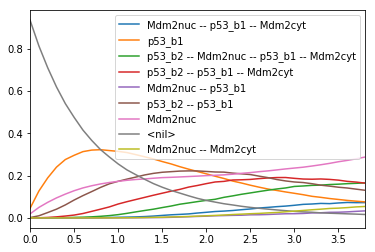

In [5]:
demo_results.plot_trajectory()

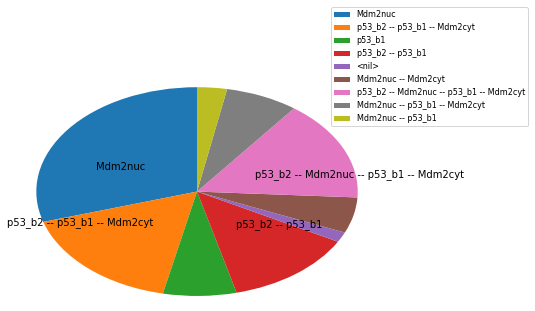

In [9]:
demo_results.plot_piechart()

### Handeling mutation

To mutate a gene you can call the method `mutate` of a simulation object. It takes as argument the name of a node and a string that can be either "ON", "OFF" or "WT" (no mutation). Note that this also modify the initial state.

In [10]:
imported_sim.mutate('Mdm2nuc', 'ON')

In [11]:
mutant_res = imported_sim.run('mutant')

MaBoSS returned 0


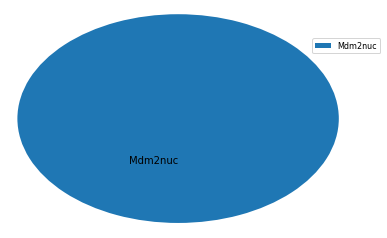

In [12]:
mutant_res.plot_piechart()

In [13]:
mutant_res.save('rpl_mutant', replace=True)